In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df['label'].value_counts()

peas and beans    500
banana            100
cotton            100
coconut           100
pomegranate       100
coffee            100
rice              100
blackgram         100
lentil            100
muskmelon         100
apple             100
watermelon        100
mango             100
grapes            100
orange            100
maize             100
jute              100
papaya            100
Name: label, dtype: int64

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [8]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            18
dtype: int64

In [9]:
df['label'].unique() 

array(['rice', 'maize', 'peas and beans', 'blackgram', 'lentil',
       'pomegranate', 'banana', 'mango', 'grapes', 'watermelon',
       'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
       'jute', 'coffee'], dtype=object)

In [10]:
crop_summary=pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.890,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.050,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.240,40.02,67.47,65.118426,7.133952,67.884151,29.973340
coconut,30.590,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.940,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.560,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.110,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.990,78.40,46.86,79.639864,6.732778,174.792798,24.958376
lentil,19.410,18.77,68.36,64.804785,6.927932,45.680454,24.509052


In [11]:
crop_summary=pd.pivot_table(df,index=['label'],aggfunc='min')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,195,0,120,90.025751,5.514253,100.117344,21.036527
banana,45,80,70,75.031933,5.505394,90.109781,25.010185
blackgram,15,20,55,60.065349,6.500145,60.417903,25.097374
coconut,25,0,5,90.017345,5.501580,131.090008,25.008724
coffee,25,80,15,50.045570,6.020947,115.156401,23.059519
cotton,15,100,35,75.005393,5.801048,60.653817,22.000851
grapes,195,0,120,80.016394,5.510925,65.010953,8.825675
jute,35,60,35,70.882596,6.002525,150.235524,23.094338
lentil,15,0,55,60.091166,5.916454,35.034848,18.064861


In [12]:
crop_summary=pd.pivot_table(df,index=['label'],aggfunc='max')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,205,40,145,94.920481,6.499227,124.983162,23.996862
banana,55,120,95,84.978492,6.490074,119.847970,29.908885
blackgram,25,60,80,69.961000,7.775306,74.915595,34.946616
coconut,35,40,30,99.981876,6.470466,225.632366,29.869083
coffee,35,120,40,69.948073,7.493192,199.473564,27.923744
cotton,25,140,60,84.876690,7.994680,99.931008,25.992374
grapes,205,40,145,83.983517,6.499605,74.915062,41.948657
jute,45,100,60,89.891065,7.488014,199.836291,26.985822
lentil,25,40,80,69.923759,7.841496,54.939377,29.944139


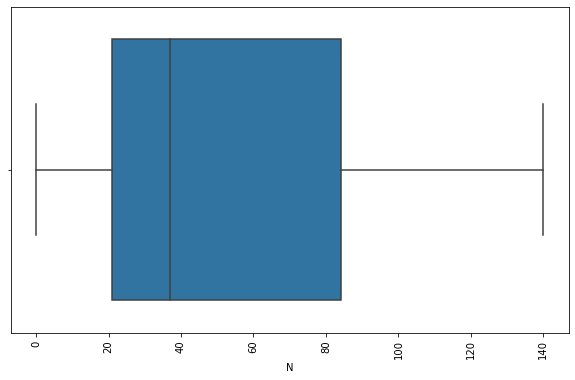

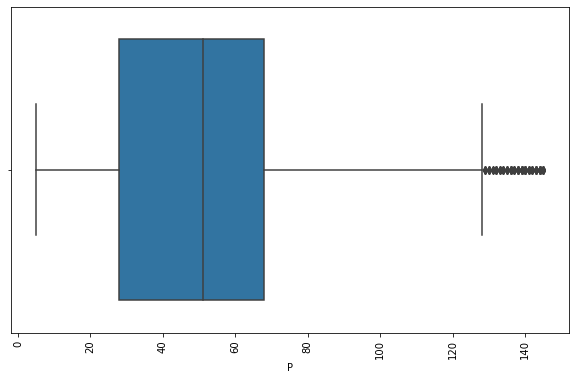

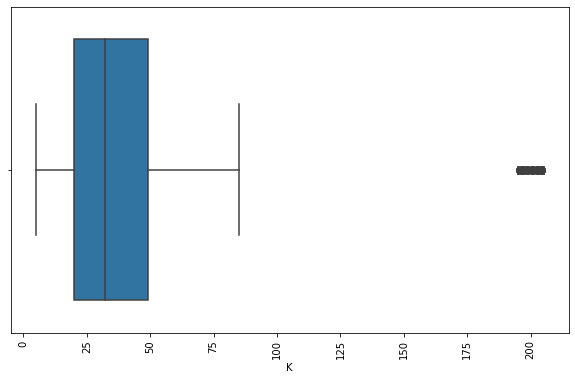

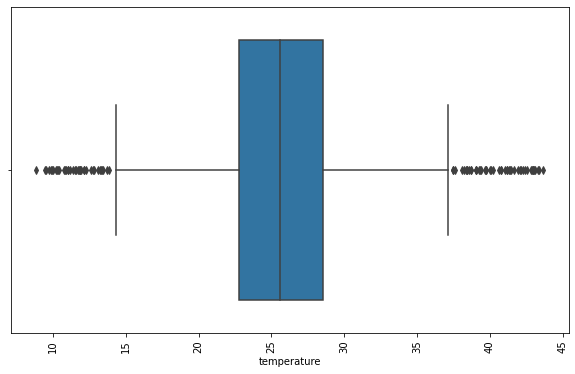

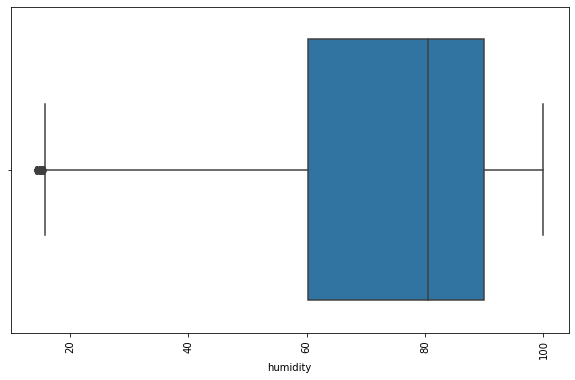

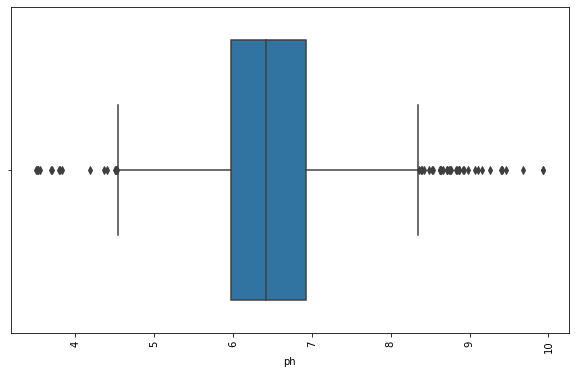

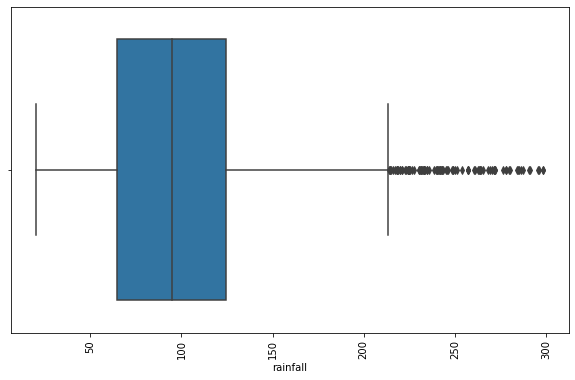

In [13]:
dfx=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in dfx.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(dfx[i])
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:>

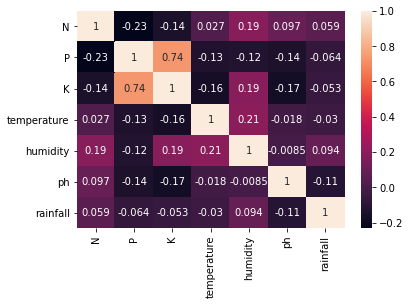

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
X=df.drop('label',axis=1)
y=df['label']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [17]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [18]:
from sklearn.preprocessing import normalize
X_train1 = normalize(X_train1)
X_test1 = normalize(X_test1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
acc=[]
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = accuracy_score(y_test, predicted_values)
acc.append(x)
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  93.66391184573003
                precision    recall  f1-score   support

         apple       1.00      1.00      1.00        38
        banana       1.00      1.00      1.00        28
     blackgram       0.56      1.00      0.72        29
       coconut       1.00      1.00      1.00        35
        coffee       1.00      1.00      1.00        33
        cotton       0.97      1.00      0.99        33
        grapes       1.00      1.00      1.00        25
          jute       0.74      0.97      0.84        35
        lentil       1.00      0.79      0.88        28
         maize       1.00      0.97      0.98        32
         mango       1.00      0.91      0.95        34
     muskmelon       1.00      1.00      1.00        26
        orange       1.00      1.00      1.00        27
        papaya       1.00      1.00      1.00        37
peas and beans       0.95      0.88      0.91       194
   pomegranate       1.00      1.00      1.00        40

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DecisionTree.fit(X_train1,y_train1)

predicted_values1 = DecisionTree.predict(X_test1)
x = accuracy_score(y_test1, predicted_values1)
acc.append(x)
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test1,predicted_values1))

DecisionTrees's Accuracy is:  82.64462809917356
                precision    recall  f1-score   support

         apple       1.00      1.00      1.00        38
        banana       1.00      0.96      0.98        28
     blackgram       1.00      0.03      0.07        29
       coconut       0.94      0.97      0.96        35
        coffee       0.86      0.76      0.81        33
        cotton       0.78      0.88      0.83        33
        grapes       1.00      1.00      1.00        25
          jute       0.51      0.71      0.60        35
        lentil       0.44      1.00      0.62        28
         maize       0.69      0.69      0.69        32
         mango       1.00      0.91      0.95        34
     muskmelon       1.00      1.00      1.00        26
        orange       0.96      1.00      0.98        27
        papaya       0.67      0.38      0.48        37
peas and beans       0.85      0.88      0.87       194
   pomegranate       0.88      0.95      0.92        40

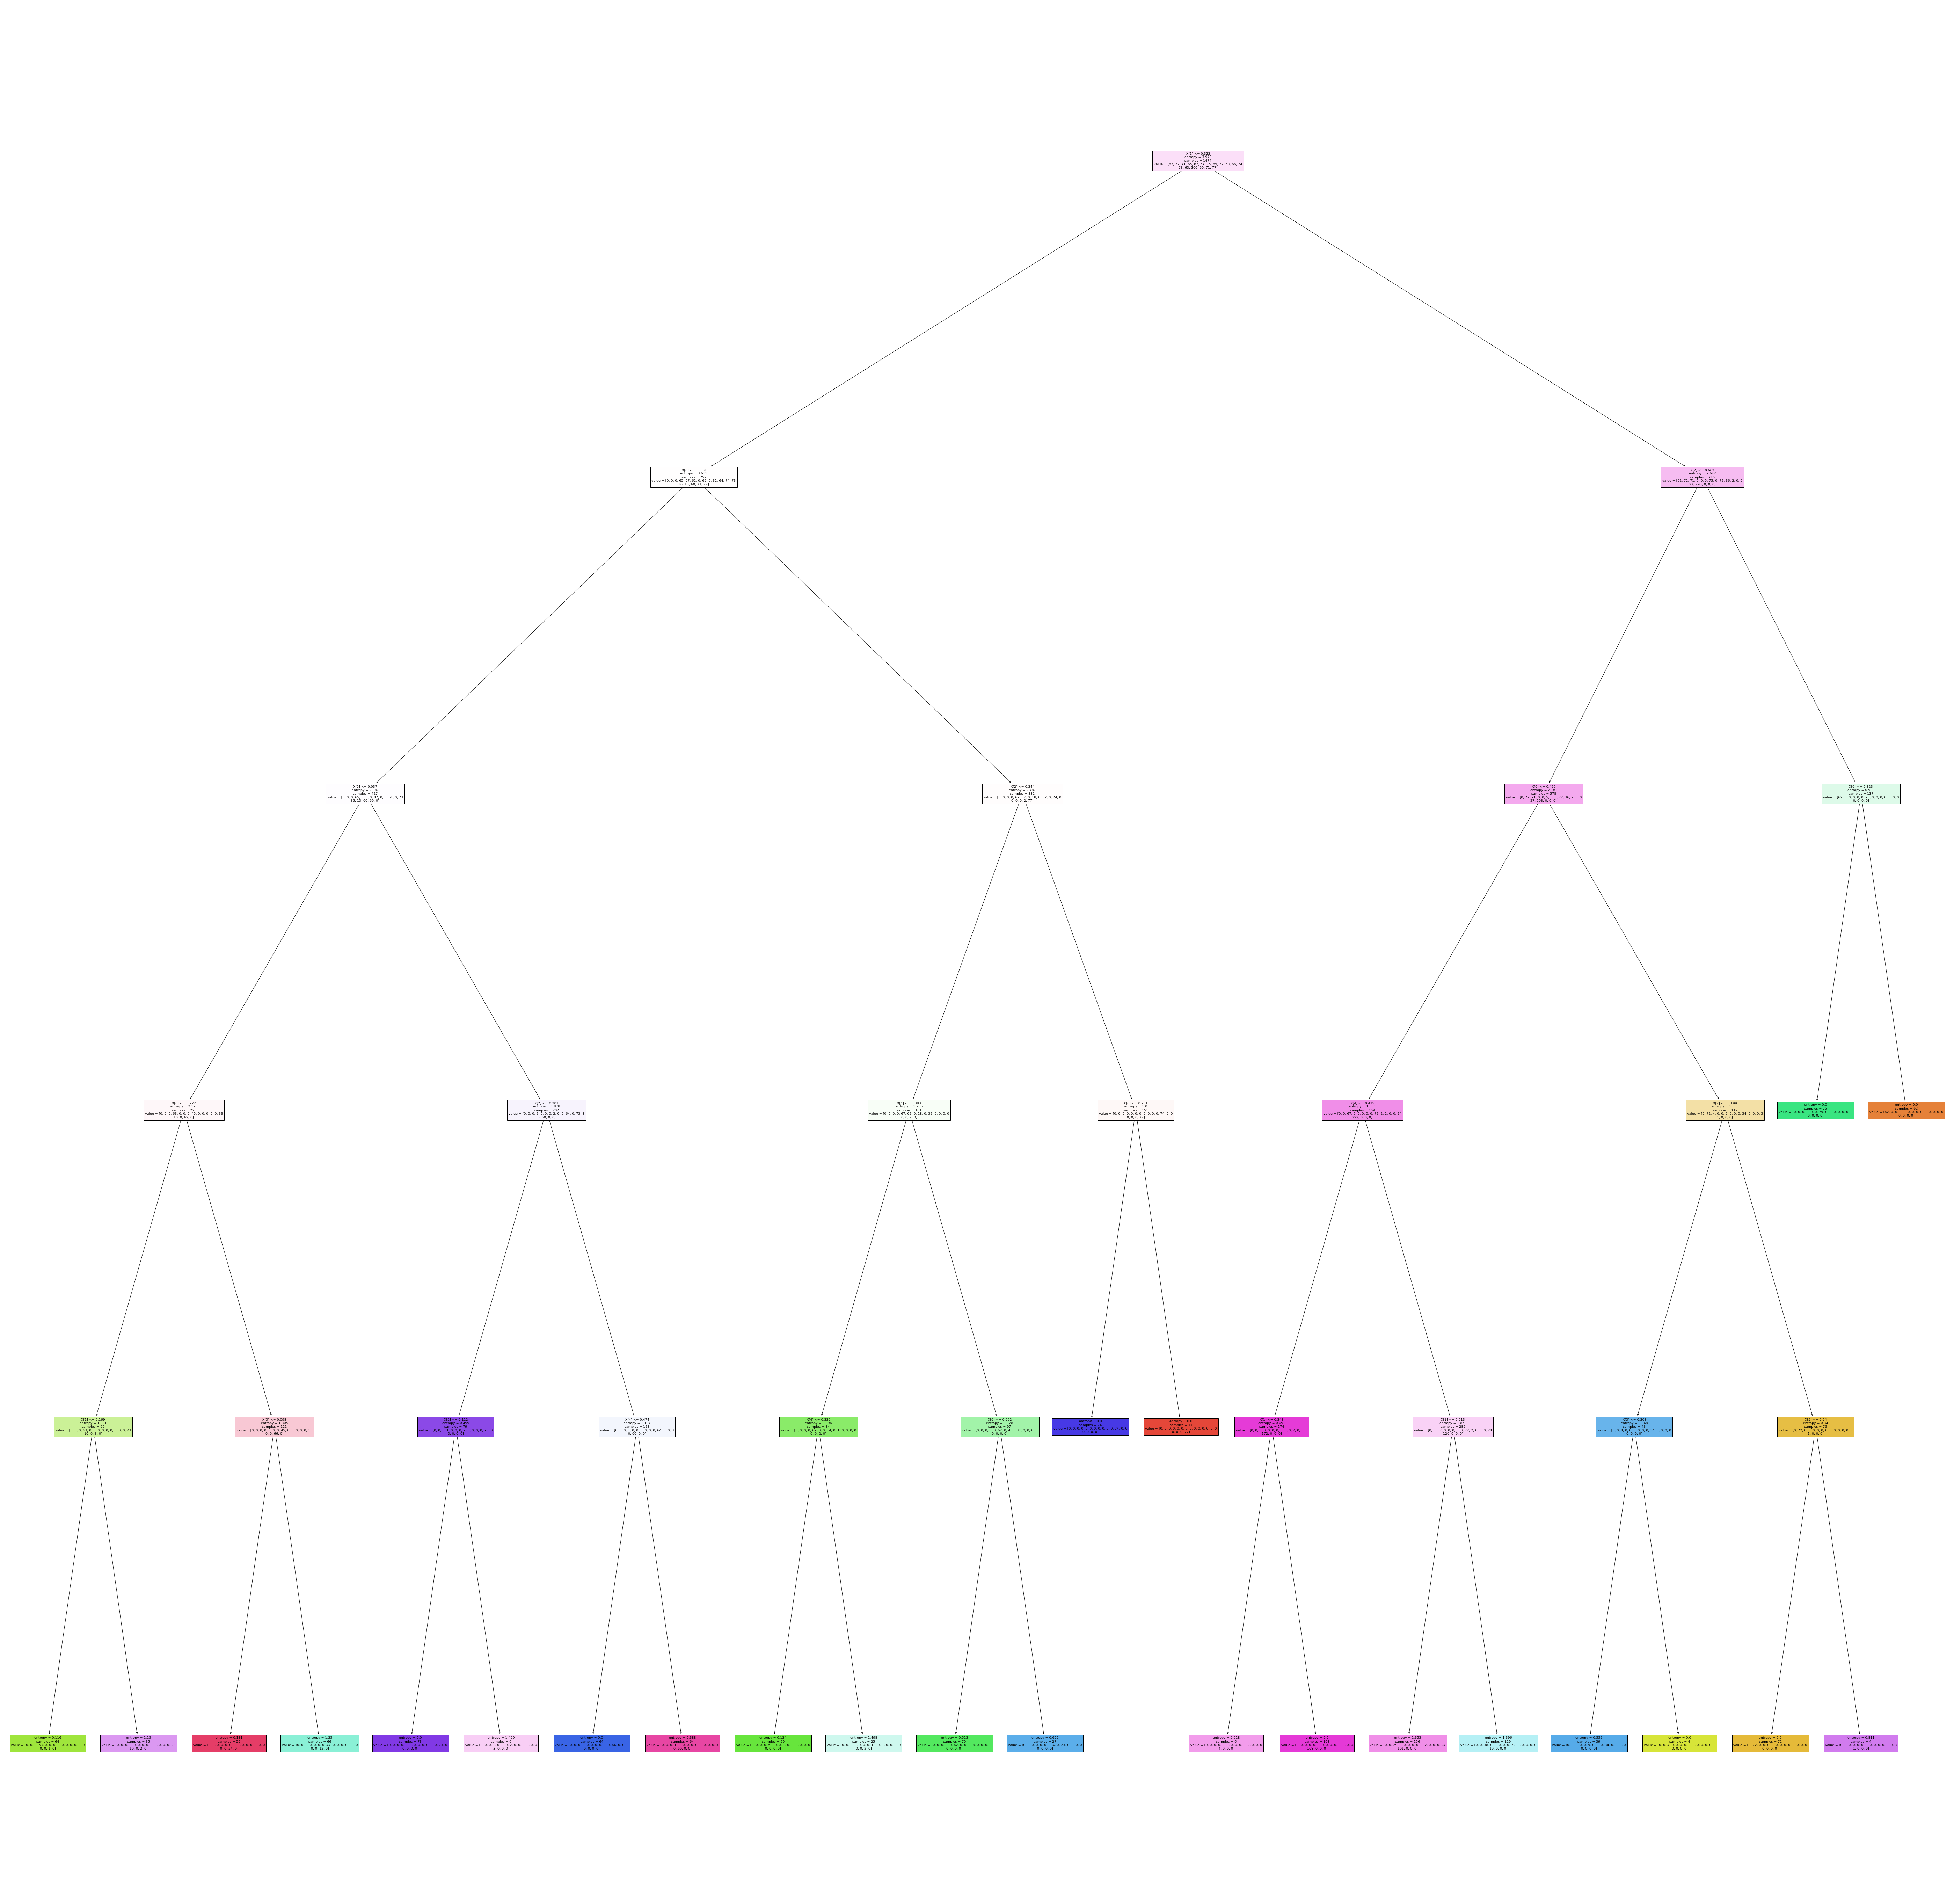

In [39]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(100,100))
tre = tree.plot_tree(DecisionTree, 
                   filled=True)

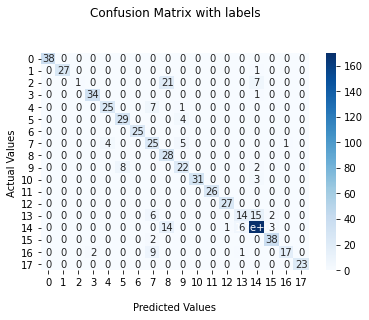

In [22]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test1,predicted_values1)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()


In [78]:
from sklearn.svm import SVC
acc1=[]
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train,y_train)
predicted_values = SVM.predict(X_test)
x = accuracy_score(y_test, predicted_values)
acc1.append(x)
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9586776859504132
                precision    recall  f1-score   support

         apple       1.00      1.00      1.00        38
        banana       1.00      1.00      1.00        28
     blackgram       0.81      0.86      0.83        29
       coconut       1.00      1.00      1.00        35
        coffee       1.00      0.94      0.97        33
        cotton       1.00      1.00      1.00        33
        grapes       1.00      1.00      1.00        25
          jute       0.79      0.97      0.87        35
        lentil       1.00      0.71      0.83        28
         maize       0.97      1.00      0.98        32
         mango       1.00      1.00      1.00        34
     muskmelon       1.00      1.00      1.00        26
        orange       1.00      1.00      1.00        27
        papaya       0.97      0.97      0.97        37
peas and beans       0.94      0.97      0.95       194
   pomegranate       1.00      1.00      1.00        40
        

In [79]:
from sklearn.svm import SVC
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train1,y_train1)
predicted_values1 = SVM.predict(X_test1)
x = accuracy_score(y_test1, predicted_values1)
acc1.append(x)
print("SVM's Accuracy is: ", x)

print(classification_report(y_test1,predicted_values1))

SVM's Accuracy is:  0.9545454545454546
                precision    recall  f1-score   support

         apple       1.00      1.00      1.00        38
        banana       1.00      1.00      1.00        28
     blackgram       0.82      0.93      0.87        29
       coconut       1.00      1.00      1.00        35
        coffee       0.97      1.00      0.99        33
        cotton       0.84      0.97      0.90        33
        grapes       1.00      1.00      1.00        25
          jute       0.80      0.91      0.85        35
        lentil       0.96      0.79      0.86        28
         maize       0.96      0.78      0.86        32
         mango       0.97      1.00      0.99        34
     muskmelon       1.00      1.00      1.00        26
        orange       1.00      1.00      1.00        27
        papaya       0.97      0.95      0.96        37
peas and beans       0.97      0.97      0.97       194
   pomegranate       1.00      1.00      1.00        40
        

In [23]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
acc=[]
predicted_values = XB.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))


[11:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9820936639118457
                precision    recall  f1-score   support

         apple       1.00      1.00      1.00        38
        banana       1.00      1.00      1.00        28
     blackgram       1.00      0.97      0.98        29
       coconut       1.00      1.00      1.00        35
        coffee       1.00      1.00      1.00        33
        cotton       0.97      1.00      0.99        33
        grapes       1.00      1.00      1.00        25
          jute       0.83      1.00      0.91        35
        lentil       1.00      0.93      0.96        28
         maize       1.00      0.97      0.98        32
         mango       1.00    

In [24]:
import xgboost as xgb
XB1 = xgb.XGBClassifier()
XB1.fit(X_train1,y_train1)
acc=[]
predicted_values1 = XB1.predict(X_test1)

x = accuracy_score(y_test1, predicted_values1)
acc.append(x)
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test1,predicted_values1))

[11:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9614325068870524
                precision    recall  f1-score   support

         apple       1.00      1.00      1.00        38
        banana       1.00      0.96      0.98        28
     blackgram       0.96      0.90      0.93        29
       coconut       1.00      1.00      1.00        35
        coffee       0.94      0.88      0.91        33
        cotton       0.86      0.94      0.90        33
        grapes       1.00      1.00      1.00        25
          jute       0.87      0.94      0.90        35
        lentil       0.96      0.96      0.96        28
         maize       0.84      0.84      0.84        32
         mango       1.00    

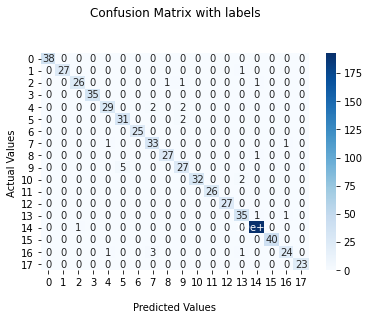

In [25]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test1,predicted_values1)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [82]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
data = normalize(data)
prediction = XB1.predict(data)
print(prediction)

['jute']


In [83]:
df.iloc[589]

N                          40
P                          45
K                          18
temperature           30.4368
humidity              55.2052
ph                    5.26129
rainfall              30.9201
label          peas and beans
Name: 589, dtype: object

In [84]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [85]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
acc=[]
predicted_values = XB.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))


[18:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9820936639118457
                precision    recall  f1-score   support

         apple       1.00      1.00      1.00        38
        banana       1.00      1.00      1.00        28
     blackgram       1.00      0.97      0.98        29
       coconut       1.00      1.00      1.00        35
        coffee       1.00      1.00      1.00        33
        cotton       0.97      1.00      0.99        33
        grapes       1.00      1.00      1.00        25
          jute       0.83      1.00      0.91        35
        lentil       1.00      0.93      0.96        28
         maize       1.00      0.97      0.98        32
         mango       1.00    

In [86]:
data = np.array([[40,45, 18, 30.4, 55.2052, 5.26129, 30.9201]])
prediction = XB.predict(data)
print(prediction)

['apple']


In [87]:
data = np.array([[40,45, 18, 30.4, 55.2052, 5.26129, 30.9201]])
data = scalar.transform(data)
prediction = XB.predict(data)
print(prediction)

['peas and beans']


In [88]:
data = np.array([[40,45, 18, 30.4, 55.2052, 5.26129, 30.9201]])
data = normalize(data)
prediction = XB1.predict(data)
print(prediction)

['peas and beans']


In [155]:
df2 = pd.read_csv("crop_production.csv")
df3 = pd.read_csv("crop_production.csv")

In [156]:
df2.drop(["District_Name","Crop_Year"],axis=1,inplace=True)
df3.drop(["District_Name","Crop_Year"],axis=1,inplace=True)

In [157]:
df2.isnull().sum()

State_Name       0
Season           0
Crop             0
Area             0
Production    3730
dtype: int64

In [158]:
df2.dropna(axis=0,inplace=True)

In [159]:
df2

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,West Bengal,Summer,Rice,306.0,801.0
246087,West Bengal,Summer,Sesamum,627.0,463.0
246088,West Bengal,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,Winter,Rice,279151.0,597899.0


In [160]:
df3['Production'] = df3['Production'].fillna(df3['Production'].mean())

In [161]:
df3.isnull().sum()

State_Name    0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [162]:
df3

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,West Bengal,Summer,Rice,306.0,801.0
246087,West Bengal,Summer,Sesamum,627.0,463.0
246088,West Bengal,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,Winter,Rice,279151.0,597899.0


In [163]:
new_df1 = df2.loc[df2["Crop"].isin(['Rice','Coconut ',
 'Maize',
 'Peas & beans (Pulses)',
 'Blackgram',
 'Lentil',
 'Pome Granet',
 'Banana',
 'Mango',
 'Grapes',
 'Water Melon',
 'Musk Melon',
 'Apple',
 'Orange',
 'Papaya',
 'Cotton(lint)',
 'Jute',
 'Coffee'])]

In [164]:
new_df2 = df3.loc[df3["Crop"].isin(['Rice','Coconut ',
 'Maize',
 'Peas & beans (Pulses)',
 'Blackgram',
 'Lentil',
 'Pome Granet',
 'Banana',
 'Mango',
 'Grapes',
 'Water Melon',
 'Musk Melon',
 'Apple',
 'Orange',
 'Papaya',
 'Cotton(lint)',
 'Jute',
 'Coffee'])]

In [165]:
new_df1.shape

(45820, 5)

In [166]:
new_df2.shape

(46382, 5)

In [167]:
new_df1.reset_index(inplace=True)

In [168]:
new_df2.reset_index(inplace=True)

In [169]:
new_df1["Crop"].value_counts()

Rice                     15082
Maize                    13787
Peas & beans (Pulses)     4447
Cotton(lint)              4382
Banana                    3133
Coconut                   1958
Jute                      1408
Papaya                     483
Mango                      449
Orange                     271
Grapes                     129
Blackgram                   99
Water Melon                 85
Pome Granet                 66
Lentil                      31
Coffee                       6
Apple                        4
Name: Crop, dtype: int64

In [170]:
new_df2.drop(["index"],axis=1,inplace=True)
new_df2

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
1,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
2,Andaman and Nicobar Islands,Whole Year,Coconut,18168.0,65100000.0
3,Andaman and Nicobar Islands,Kharif,Rice,83.0,300.0
4,Andaman and Nicobar Islands,Whole Year,Coconut,18190.0,64430000.0
...,...,...,...,...,...
46377,West Bengal,Autumn,Rice,264.0,721.0
46378,West Bengal,Rabi,Peas & beans (Pulses),12.0,12.0
46379,West Bengal,Summer,Maize,325.0,2039.0
46380,West Bengal,Summer,Rice,306.0,801.0


In [171]:
data_dum = pd.get_dummies(new_df1)
data_dum[:5]

,index,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Jute,Crop_Lentil,Crop_Maize,Crop_Mango,Crop_Orange,Crop_Papaya,Crop_Peas & beans (Pulses),Crop_Pome Granet,Crop_Rice,Crop_Water Melon
0,2,102.0,321.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,176.0,641.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,18168.0,65100000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,83.0,300.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,18190.0,64430000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
data_dum.drop("index",inplace=True,axis=1)

In [107]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
s2 = MinMaxScaler()

In [108]:
data_dum

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Jute,Crop_Lentil,Crop_Maize,Crop_Mango,Crop_Orange,Crop_Papaya,Crop_Peas & beans (Pulses),Crop_Pome Granet,Crop_Rice,Crop_Water Melon
0,102.0,321.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,176.0,641.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18168.0,65100000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,83.0,300.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,18190.0,64430000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45815,264.0,721.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45816,12.0,12.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45817,325.0,2039.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
45818,306.0,801.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
X1 = data_dum.drop("Production",axis=1)
y1 = data_dum[["Production"]]
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.34, random_state=42)
print("x_train :",X_train1.shape)
print("x_test :",X_test1.shape)
print("y_train :",y_train1.shape)
print("y_test :",y_test1.shape)

x_train : (30241, 57)
x_test : (15579, 57)
y_train : (30241, 1)
y_test : (15579, 1)


In [110]:
#X_train1[["Area"]] = scalar.fit_transform(X_train1[["Area"]])
#y_train1 = scalar.fit_transform(y_train1)

In [111]:
#X_test1[["Area"]] = scalar.transform(X_test1[["Area"]])

In [112]:
#y_test1 = scalar.transform(y_test1)

In [113]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train1,y_train1)

DecisionTreeRegressor(random_state=42)

In [114]:
preds = regressor.predict(X_test1)
from sklearn.metrics import r2_score
#mean_squared_error(y_test1,preds)
r2_score(y_test1,preds)

0.8314269406673684

In [115]:
data_dum.columns

Index(['Area', 'Production', 'State_Name_Andaman and Nicobar Islands',
       'State_Name_Andhra Pradesh', 'State_Name_Arunachal Pradesh',
       'State_Name_Assam', 'State_Name_Bihar', 'State_Name_Chandigarh',
       'State_Name_Chhattisgarh', 'State_Name_Dadra and Nagar Haveli',
       'State_Name_Goa', 'State_Name_Gujarat', 'State_Name_Haryana',
       'State_Name_Himachal Pradesh', 'State_Name_Jammu and Kashmir ',
       'State_Name_Jharkhand', 'State_Name_Karnataka', 'State_Name_Kerala',
       'State_Name_Madhya Pradesh', 'State_Name_Maharashtra',
       'State_Name_Manipur', 'State_Name_Meghalaya', 'State_Name_Mizoram',
       'State_Name_Nagaland', 'State_Name_Odisha', 'State_Name_Puducherry',
       'State_Name_Punjab', 'State_Name_Rajasthan', 'State_Name_Sikkim',
       'State_Name_Tamil Nadu', 'State_Name_Telangana ', 'State_Name_Tripura',
       'State_Name_Uttar Pradesh', 'State_Name_Uttarakhand',
       'State_Name_West Bengal', 'Season_Autumn     ', 'Season_Kharif     ',

In [116]:
np.array([[102,321,1,0,0,]])

array([[102, 321,   1,   0,   0]])

In [191]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train1,y_train1)
preds = model.predict(X_test1)

In [192]:
from sklearn.metrics import r2_score
r = r2_score(y_test1,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.8608157734375528


In [120]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train1,y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [125]:
from sklearn.metrics import mean_squared_error
preds = xgbr.predict(X_test1)

mean_squared_error(y_test1,preds)
r2_score(y_test1,preds)

0.8760281174437221

In [146]:
new_df2

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
1,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
2,Andaman and Nicobar Islands,Whole Year,Coconut,18168.0,65100000.0
3,Andaman and Nicobar Islands,Kharif,Rice,83.0,300.0
4,Andaman and Nicobar Islands,Whole Year,Coconut,18190.0,64430000.0
...,...,...,...,...,...
46377,West Bengal,Autumn,Rice,264.0,721.0
46378,West Bengal,Rabi,Peas & beans (Pulses),12.0,12.0
46379,West Bengal,Summer,Maize,325.0,2039.0
46380,West Bengal,Summer,Rice,306.0,801.0


In [173]:
from sklearn.preprocessing import LabelEncoder
new_df2

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
1,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
2,Andaman and Nicobar Islands,Whole Year,Coconut,18168.0,65100000.0
3,Andaman and Nicobar Islands,Kharif,Rice,83.0,300.0
4,Andaman and Nicobar Islands,Whole Year,Coconut,18190.0,64430000.0
...,...,...,...,...,...
46377,West Bengal,Autumn,Rice,264.0,721.0
46378,West Bengal,Rabi,Peas & beans (Pulses),12.0,12.0
46379,West Bengal,Summer,Maize,325.0,2039.0
46380,West Bengal,Summer,Rice,306.0,801.0


In [179]:
le = LabelEncoder()
new_df2["State_Name"] = le.fit_transform(new_df2["State_Name"])
new_df2["Crop"] = le.fit_transform(new_df2["Crop"])
new_df2["Season"] = le.fit_transform(new_df2["Season"])
new_df2

,State_Name,Season,Crop,Area,Production
0,0,1,15,102.0,321.0
1,0,4,1,176.0,641.0
2,0,4,3,18168.0,65100000.0
3,0,1,15,83.0,300.0
4,0,4,3,18190.0,64430000.0
...,...,...,...,...,...
46377,32,0,15,264.0,721.0
46378,32,2,13,12.0,12.0
46379,32,3,9,325.0,2039.0
46380,32,3,15,306.0,801.0


In [180]:
X2 = new_df2.drop("Production",axis=1)
y2 = new_df2[["Production"]]
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.34, random_state=42)
print("x_train :",X_train2.shape)
print("x_test :",X_test2.shape)
print("y_train :",y_train2.shape)
print("y_test :",y_test2.shape)

x_train : (30612, 4)
x_test : (15770, 4)
y_train : (30612, 1)
y_test : (15770, 1)


In [189]:
from sklearn.ensemble import RandomForestRegressor
modelx = RandomForestRegressor()
modelx.fit(X_train2,y_train2)
preds = modelx.predict(X_test2)

In [190]:
from sklearn.metrics import r2_score
r = r2_score(y_test2,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.8251396014593557


In [193]:
X_train1

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,...,Crop_Jute,Crop_Lentil,Crop_Maize,Crop_Mango,Crop_Orange,Crop_Papaya,Crop_Peas & beans (Pulses),Crop_Pome Granet,Crop_Rice,Crop_Water Melon
12995,76900.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28858,23000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24761,900.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30272,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
31246,183000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44732,112009.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38158,6310.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
860,118754.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
West Bengal	Summer	Maize	325.0	2039.0

In [195]:
model.predict(np.array([[325, 0,
       0, 0,
       0, 0, 0,
       0,0,
       0, 0, 0,
       0, 0,
       0, 0, 0,
       0, 0,
       0, 0, 0,
       0, 0, 0,
      0, 0, 0,
       0, 0, 0,
       0, 0,
       1, 0, 0,
       0,1, 0,
       0, 0, 0, 0,
       0,0, 0, 0,
       0, 0, 1,0, 0,
       0, 0, 0,
       0, 0]]))

array([1482.09833333])

In [200]:
x = df3.loc[df3["State_Name"].isin(['West Bengal'])]